In [137]:
import pandas as pd
import os

import bokeh
from bokeh.io import output_notebook, curdoc, reset_output
from bokeh.plotting import figure, output_file, show, ColumnDataSource

import numpy as np
import scipy.special
# used to standardize plot size below
GLOBAL_WIDTH = 800
GLOBAL_HEIGHT = 600

# display notebooks inline
output_notebook() 
import bokeh.plotting as bk
from bokeh.models import Span, Label
from bokeh.layouts import row
from bokeh.sampledata.autompg import autompg as df
import matplotlib.pyplot as plt

from bokeh.io import export_png
from scipy.stats import pearsonr


Loading BokehJS ...

In [138]:
pp = pd.read_csv('../data/picasso.csv')
pp2 = pd.read_csv('../data/henri_dic.csv')
pp = pp.rename(columns={'Unnamed: 0': 'Picturesource', '0': 'Painting'})
pp2 = pp2.rename(columns={'Unnamed: 0': 'Picturesource', '0': 'Painting'})

In [139]:
pp['Painting'] = pp.apply(lambda row: row.Painting.lower(), axis = 1)
pp2['Painting'] = pp2.apply(lambda row: row.Painting.lower(), axis = 1)


**Compare their RMS similarities before and after they met**

In [140]:
p_before_1906 = pdf.loc[pdf.Year<1906]
p_after_1906 = pdf.loc[pdf.Year>=1906]

m_before_1906 = mdf.loc[mdf.Year<1906]
m_after_1906 = mdf.loc[mdf.Year>=1906]

In [141]:
picasso_before_sample = p_before_1906.sample(n=50, replace=True,random_state=1).RMS_contrast
matisse_before_sample = m_before_1906.sample(n=50, replace=True,random_state=1).RMS_contrast
np.corrcoef(picasso_before_sample, matisse_before_sample)

array([[ 1.        , -0.05345678],
       [-0.05345678,  1.        ]])

In [142]:
picasso_after_sample = p_after_1906.sample(n=50, replace=True,random_state=1).RMS_contrast
matisse_after_sample = m_after_1906.sample(n=50, replace=True,random_state=1).RMS_contrast
np.corrcoef(picasso_after_sample, matisse_after_sample)

array([[ 1.       , -0.0961737],
       [-0.0961737,  1.       ]])

In [143]:
picasso_data = pd.read_csv('../data/picasso_data.csv')
matisse_data = pd.read_csv('../data/matisse_data.csv')
pp['Picturesource'] = pp['Picturesource'].apply(lambda x: os.path.join(os.pardir, 'data/picasso', x))
# pdf['Painting'] = pp['Painting'].apply(lambda x: x[2:-8])
pp2['Picturesource'] = pp2['Picturesource'].apply(lambda x: os.path.join(os.pardir, 'data/henri_matisse', x))
# mdf['Painting'] = pp2['Painting'].apply(lambda x: x[2:-8])


pdf = pd.merge(pp,picasso_data,on='Painting')
mdf = pd.merge(pp2,matisse_data,on='Painting')

pdf_mistress=pdf[pdf["Portrait"]==1]
pdf_maternity=pdf[pdf["Portrait"]==0]
mdf_mistress=mdf[mdf["Portrait"]==1]
mdf_maternity=mdf[mdf["Portrait"]==0]

**Compare RMS value of Maternity group and Mistress group within the paintings of Pablo Picasso**

In [144]:
from bokeh.io import export_png

# export_png(plot, filename="plot.png")


In [145]:
p_meanRMS=pdf.groupby('Year').mean()
m_meanRMS=mdf.groupby('Year').mean()

Text(0, 0.5, 'Count(#)')

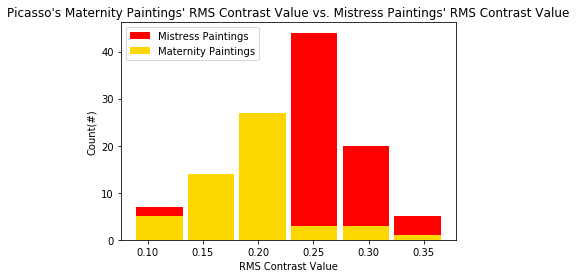

In [146]:
bins=np.linspace(min(pdf['RMS_contrast']), max(pdf['RMS_contrast']), 7)
pdf_mistress['RMS_contrast'].plot.hist(bins=bins, rwidth=0.9, label="Mistress Paintings", color = 'red')
pdf_maternity['RMS_contrast'].plot.hist(bins=bins, rwidth=0.9, label="Maternity Paintings", color = 'gold')
plt.title("Picasso's Maternity Paintings' RMS Contrast Value vs. Mistress Paintings' RMS Contrast Value")
plt.legend()
plt.xlabel('RMS Contrast Value')
plt.ylabel('Count(#)')

In [147]:
# plt.savefig()

**Compare RMS value of Maternity group and Mistress group within the paintings of Henri Matisse**

Text(0, 0.5, 'Count(#)')

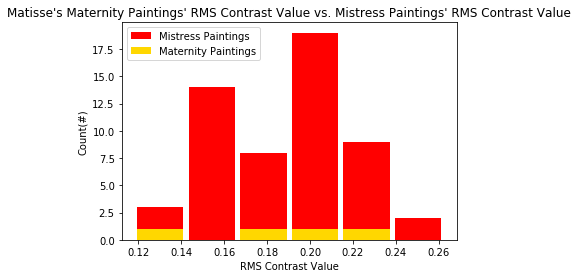

In [148]:
bins=np.linspace(min(mdf['RMS_contrast']), max(mdf['RMS_contrast']), 7)
mdf_mistress['RMS_contrast'].plot.hist(bins=bins, rwidth=0.9, label="Mistress Paintings", color = 'red')
mdf_maternity['RMS_contrast'].plot.hist(bins=bins, rwidth=0.9, label="Maternity Paintings", color = 'gold')
plt.title("Matisse's Maternity Paintings' RMS Contrast Value vs. Mistress Paintings' RMS Contrast Value")
plt.legend()
plt.xlabel('RMS Contrast Value')
plt.ylabel('Count(#)')

**Compare the mean RMS contrast value over years between Picasso's and Matisse's paintings**

Text(0, 0.5, 'Count(#)')

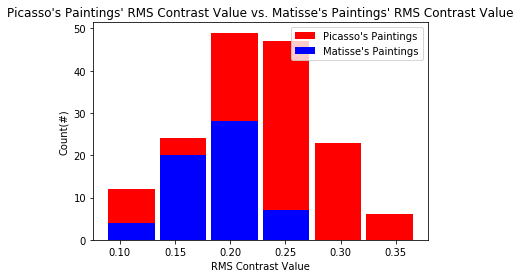

In [149]:
bins=np.linspace(min(pdf['RMS_contrast']), max(pdf['RMS_contrast']), 7)
pdf['RMS_contrast'].plot.hist(bins=bins, rwidth=0.9, label="Picasso's Paintings", color='red')
mdf['RMS_contrast'].plot.hist(bins=bins, rwidth=0.9, label="Matisse's Paintings", color = 'blue')
plt.title("Picasso's Paintings' RMS Contrast Value vs. Matisse's Paintings' RMS Contrast Value")
plt.legend()
plt.xlabel('RMS Contrast Value')
plt.ylabel('Count(#)')

**Demonstrate the Mean RMS contrast over years**

In [150]:
x = p_meanRMS.index
y = p_meanRMS['RMS_contrast']

x2 = m_meanRMS.index
y2 = m_meanRMS['RMS_contrast']


output_notebook()

p = figure(title="Compare Mean RMS contrast overyear", x_axis_label='Year', y_axis_label='Mean_RMS_contrast')

p.line(x, y, legend_label="Picasso_Mean_RMS_contrast_overyear", line_width=2, line_color = "#f44343")
p.line(x2, y2, legend_label="Matisse_Mean_RMS_contrast_overyear", line_width=2,line_color="#4643f4")

show(p)

# export_png(p, filename="Compare Mean RMS contrast overyear.png")

Loading BokehJS ...

**Demonstrate the erotic charge over years**

In [151]:
x = p_meanRMS.index
y = p_meanRMS['erotic_charge']

x2 = m_meanRMS.index
y2 = m_meanRMS['erotic_charge']


# display inline
output_notebook()

# create a new plot with a title and axis labels
p = figure(title="Compare Erotic Charge overyear", x_axis_label='Year', y_axis_label='erotic_charge')

# add a line renderer with legend and line thickness
p.line(x, y, legend_label="Picasso_erotic_charge_overyear", line_width=2, line_color = "#f44343")
p.line(x2, y2, legend_label="Matisse_erotic_charge_overyear", line_width=2,line_color="#4643f4")

# show the results
show(p)

Loading BokehJS ...

In [152]:
x = pdf['RMS_contrast']
y = pdf['AVG_entropy']

x2 = mdf['RMS_contrast']
y2 = mdf['AVG_entropy']

p = figure(title="Picasso & Matisso's paintings' RMS contrast value vs. AVG_entropy",plot_width=GLOBAL_WIDTH, plot_height=GLOBAL_HEIGHT, x_axis_label='RMS_contrast', y_axis_label='AVG_entropy')

p.circle(x, y, size=5, color="red", alpha=0.9,legend_label="Picasso")
p.circle(x2, y2, size=5, color="blue", alpha=0.9,legend_label="Matisse")

show(p)

In [153]:
x = pdf_mistress['RMS_contrast']
y = pdf_mistress['AVG_entropy']

x2 = pdf_maternity['RMS_contrast']
y2 = pdf_maternity['AVG_entropy']

p = figure(title="Picasso 's paintings' RMS contrast value vs. AVG_entropy",plot_width=GLOBAL_WIDTH, plot_height=GLOBAL_HEIGHT, x_axis_label='RMS_contrast', y_axis_label='AVG_entropy')

p.circle(x, y, size=5, color="red", alpha=0.9,legend_label="Mistress")
p.circle(x2, y2, size=5, color="gold", alpha=0.9,legend_label="Maternity")

show(p)

In [154]:
x = mdf_mistress['RMS_contrast']
y = mdf_mistress['AVG_entropy']

x2 = mdf_maternity['RMS_contrast']
y2 = mdf_maternity['AVG_entropy']

p = figure(title="Matisse 's paintings' RMS contrast value vs. AVG_entropy",plot_width=GLOBAL_WIDTH, plot_height=GLOBAL_HEIGHT, x_axis_label='RMS_contrast', y_axis_label='AVG_entropy')

p.circle(x, y, size=5, color="red", alpha=0.9,legend_label="Mistress")
p.circle(x2, y2, size=5, color="gold", alpha=0.9,legend_label="Maternity")

show(p)

In [155]:
source = ColumnDataSource(data=dict(
    x=pdf['Year'],
    y=pdf['RMS_contrast_log'],
    desc=pdf['Painting'],
    imgs=pdf['Picturesource_x'],
    fonts=[
        '<i>italics</i>' for i in range(len(pdf.index))
    ]
))

source2 = ColumnDataSource(data=dict(
    x2=mdf['Year'],
    y2=mdf['RMS_contrast_log'],
    desc=mdf['Painting'],
    imgs=mdf['Picturesource_x'],
    fonts=[
        '<i>italics</i>' for i in range(len(mdf.index))
    ]
))


TOOLTIPS = """
    <div>
        <div>
            <img
                src="@imgs" height="42" alt="@imgs" width="42"
                style="float: left; margin: 0px 15px 15px 0px;"
                border="2"
            ></img>
        </div>
        <div>
            <span style="font-size: 17px; font-weight: bold;">@desc</span>
            <span style="font-size: 15px; color: #966;">[$index]</span>
        </div>
        <div>
            <span style="font-size: 15px;">Painting Year:</span>
            <span style="font-size: 10px; color: #696;">$x{0}</span>
        </div>
        <div>
            <span style="font-size: 15px;">RMS Contrast Log Value:</span>
            <span style="font-size: 10px; color: #696;">$y</span>
        </div>
    </div>
"""
TOOLTIPS2 = """
    <div>
        <div>
            <span style="font-size: 15px;">The year they met each other.</span>
        </div>
    </div>
"""

p = figure(plot_width=GLOBAL_WIDTH, plot_height=GLOBAL_HEIGHT, tooltips=TOOLTIPS,
           title="Paintings' RMS contrast log Value Throughout Year",x_axis_label='Year', y_axis_label='RMS_contrast_log')

p.circle('x', 'y', size=10, source=source,color="red",legend_label="Picasso")
p.circle('x2', 'y2', size=10, source=source2,color = "blue",legend_label="Matisse")
vline = Span(location=1906, dimension='height', line_color='black', line_width=1,line_dash="dashed")
p.renderers.extend([vline])
my_label = Label(x=1906, y=500, y_units='screen', text='Year 1906 when they met each other')
p.add_layout(my_label)
show(p)

In [156]:
source = ColumnDataSource(data=dict(
    x=pdf['Year'],
    y=pdf['AVG_entropy_log'],
    desc=pdf['Painting'],
    imgs=pdf['Picturesource_x'],
    fonts=[
        '<i>italics</i>' for i in range(len(pdf.index))
    ]
))

source2 = ColumnDataSource(data=dict(
    x2=mdf['Year'],
    y2=mdf['AVG_entropy_log'],
    desc=mdf['Painting'],
    imgs=mdf['Picturesource_x'],
    fonts=[
        '<i>italics</i>' for i in range(len(mdf.index))
    ]
))


TOOLTIPS = """
    <div>
        <div>
            <img
                src="@imgs" height="42" alt="@imgs" width="42"
                style="float: left; margin: 0px 15px 15px 0px;"
                border="2"
            ></img>
        </div>
        <div>
            <span style="font-size: 17px; font-weight: bold;">@desc</span>
            <span style="font-size: 15px; color: #966;">[$index]</span>
        </div>
        <div>
            <span style="font-size: 15px;">Painting Year:</span>
            <span style="font-size: 10px; color: #696;">$x{0}</span>
        </div>
        <div>
            <span style="font-size: 15px;">AVG Entropy Log</span>
            <span style="font-size: 10px; color: #696;">$y</span>
        </div>
    </div>
"""
TOOLTIPS2 = """
    <div>
        <div>
            <span style="font-size: 15px;">The year they met each other.</span>
        </div>
    </div>
"""

p = figure(plot_width=GLOBAL_WIDTH, plot_height=GLOBAL_HEIGHT, tooltips=TOOLTIPS,
           title="Paintings' AVG Entropy Log Value Throughout Year",x_axis_label='Year', y_axis_label='AVG_entropy_log')

p.circle('x', 'y', size=10, source=source,color="red",legend_label="Picasso")
p.circle('x2', 'y2', size=10, source=source2,color = "blue",legend_label="Matisse")
vline = Span(location=1906, dimension='height', line_color='black', line_width=1,line_dash="dashed")
p.renderers.extend([vline])
my_label = Label(x=1906, y=500, y_units='screen', text='Year 1906 when they met each other')
p.add_layout(my_label)
show(p)

In [157]:
source = ColumnDataSource(data=dict(
    x=pdf['Year'],
    y=pdf['erotic_charge'],
    desc=pdf['Painting'],
    imgs=pdf['Picturesource_x'],
    fonts=[
        '<i>italics</i>' for i in range(len(pdf.index))
    ]
))

source2 = ColumnDataSource(data=dict(
    x2=mdf['Year'],
    y2=mdf['erotic_charge'],
    desc=mdf['Painting'],
    imgs=mdf['Picturesource_x'],
    fonts=[
        '<i>italics</i>' for i in range(len(mdf.index))
    ]
))


TOOLTIPS = """
    <div>
        <div>
            <img
                src="@imgs" height="42" alt="@imgs" width="42"
                style="float: left; margin: 0px 15px 15px 0px;"
                border="2"
            ></img>
        </div>
        <div>
            <span style="font-size: 17px; font-weight: bold;">@desc</span>
            <span style="font-size: 15px; color: #966;">[$index]</span>
        </div>
        <div>
            <span style="font-size: 15px;">Painting Year:</span>
            <span style="font-size: 10px; color: #696;">$x{0}</span>
        </div>
        <div>
            <span style="font-size: 15px;">Erotic Charge Value:</span>
            <span style="font-size: 10px; color: #696;">$y{0.000}</span>
        </div>
    </div>
"""
TOOLTIPS2 = """
    <div>
        <div>
            <span style="font-size: 15px;">The year they met each other.</span>
        </div>
    </div>
"""

p = figure(plot_width=GLOBAL_WIDTH, plot_height=GLOBAL_HEIGHT, tooltips=TOOLTIPS,
           title="Paintings' Erotic Charge Value Throughout Year",x_axis_label='Year', y_axis_label='erotic_charge')

p.circle('x', 'y', size=10, source=source,color="red",legend_label="Picasso")
p.circle('x2', 'y2', size=10, source=source2,color = "blue", legend_label="Matisse")
vline = Span(location=1906, dimension='height', line_color='black', line_width=1,line_dash="dashed")
p.renderers.extend([vline])
my_label = Label(x=1906, y=500, y_units='screen', text='Year 1906 when they met each other')
p.add_layout(my_label)
show(p)